# Data Analysis & Visualization in Finance — Technical Analysis of Stocks using Python

For this analysis, I have used two years of historical data from Feb 2018 to Feb 2020 of the below stocks listed on National Stock Exchange(NSE)— 

* HDFC Ltd.

* Sun Pharmaceutical Industries Ltd.

* Tata Consultancy Services Ltd.

* Jindal Steel & Power Ltd.

* Jubilant FoodWorks Ltd.

In [45]:
# import necessary libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [46]:
# read data from csv file

HDFC_df = pd.read_csv("HDFC.csv")
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,1828.900024,1851.000000,1819.150024,1829.500000,1780.624512,3382968.0
1,2018-02-16,1835.500000,1836.949951,1804.199951,1815.500000,1766.998535,2368880.0
2,2018-02-19,1827.750000,1830.199951,1801.000000,1814.050049,1765.587524,1603737.0
3,2018-02-20,1832.900024,1840.000000,1802.500000,1811.750000,1763.348633,2523482.0
4,2018-02-21,1825.000000,1832.699951,1816.000000,1824.800049,1776.050171,3795216.0


In [47]:
# round-off some values 

HDFC_df = HDFC_df.round(2)
HDFC_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,1828.9,1851.00,1819.15,1829.5,1780.62,3382968.0
1,2018-02-16,1835.5,1836.95,1804.20,1815.5,1767.00,2368880.0


In [4]:
# shape of dataframe

HDFC_df.shape

(491, 7)

In [49]:
# columns of dataframe

HDFC_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [48]:
# determining null entries 

HDFC_df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [50]:
# check the null entry 

HDFC_df[HDFC_df.Open.isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
413,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# drop null values 

HDFC_df.dropna(inplace = True, axis = 0)

In [52]:
# check the datatype 

HDFC_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [53]:
# Convert the date column type to datetime 

HDFC_df['Date'] = pd.to_datetime(HDFC_df['Date'])
HDFC_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,1828.9,1851.00,1819.15,1829.5,1780.62,3382968.0
1,2018-02-16,1835.5,1836.95,1804.20,1815.5,1767.00,2368880.0


In [54]:
# total number of days under consideration 

HDFC_df['Date'].max() - HDFC_df['Date'].min()

Timedelta('729 days 00:00:00')

In [55]:
# general stats for last 90 days 

HDFC_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,2302,2325,2281,2307,2307,3164814
std,142,143,142,142,142,1351297
min,1974,1996,1963,1969,1969,945874
25%,2209,2232,2194,2214,2214,2263895
50%,2323,2348,2301,2331,2331,2776124
75%,2425,2444,2404,2421,2421,3497831
max,2486,2499,2471,2492,2492,8808006


In [56]:
# Set the Date columns as index of the dataframe for further analysis 

HDFC_df.index = HDFC_df['Date']

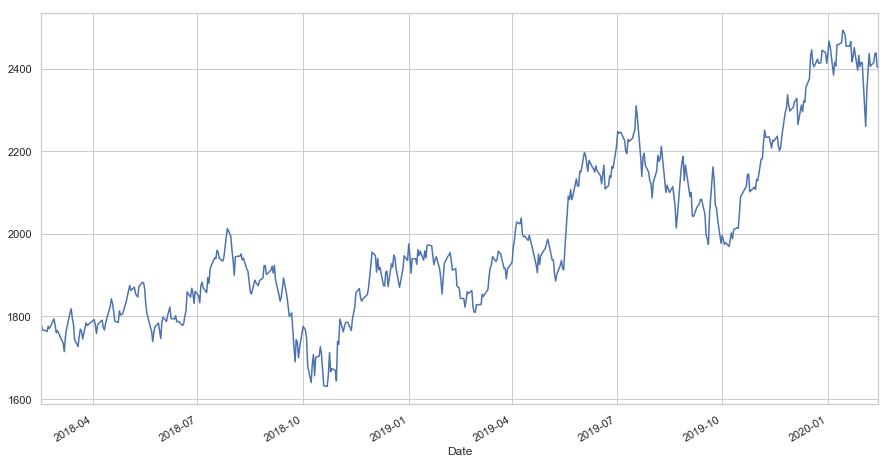

In [57]:
# observe general price variation of the closing price

sns.set_style('whitegrid')
HDFC_df['Adj Close'].plot(figsize = (15,8))
plt.show()

In [59]:
# Add a new column 'Day_Perc_Change' which give the daily returns 

HDFC_df['Day_Perc_Change'] = HDFC_df['Adj Close'].pct_change()*100  

In [60]:
# Replace NaN with 0 

HDFC_df['Day_Perc_Change'] = HDFC_df['Day_Perc_Change'].fillna(0)      
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2018-02-15,2018-02-15,1828.90,1851.00,1819.15,1829.50,1780.62,3382968.0,0.000000
2018-02-16,2018-02-16,1835.50,1836.95,1804.20,1815.50,1767.00,2368880.0,-0.764902
2018-02-19,2018-02-19,1827.75,1830.20,1801.00,1814.05,1765.59,1603737.0,-0.079796
2018-02-20,2018-02-20,1832.90,1840.00,1802.50,1811.75,1763.35,2523482.0,-0.126870
2018-02-21,2018-02-21,1825.00,1832.70,1816.00,1824.80,1776.05,3795216.0,0.720220


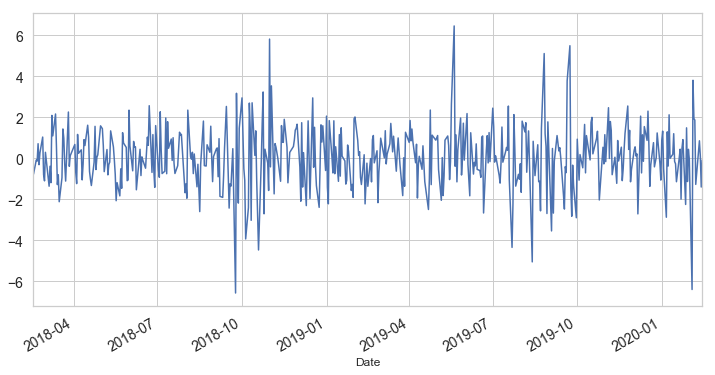

In [61]:
# daily returns(day-to-day percentage change) plot 

HDFC_df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 14)

In [62]:
# Add a new column trend whose values are determined by the below relationship 

def trend(x):
    if x > -0.5 and x <= 0.5:
        return 'Slight or No change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'
    
HDFC_df['Trend'] = np.zeros(HDFC_df['Day_Perc_Change'].count())
HDFC_df['Trend'] = HDFC_df['Day_Perc_Change'].apply(lambda x: trend(x))

In [64]:
# display first few entires 

HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2018-02-15,2018-02-15,1828.90,1851.00,1819.15,1829.50,1780.62,3382968.0,0.000000,Slight or No change
2018-02-16,2018-02-16,1835.50,1836.95,1804.20,1815.50,1767.00,2368880.0,-0.764902,Slight Negative
2018-02-19,2018-02-19,1827.75,1830.20,1801.00,1814.05,1765.59,1603737.0,-0.079796,Slight or No change
2018-02-20,2018-02-20,1832.90,1840.00,1802.50,1811.75,1763.35,2523482.0,-0.126870,Slight or No change
2018-02-21,2018-02-21,1825.00,1832.70,1816.00,1824.80,1776.05,3795216.0,0.720220,Slight Positive


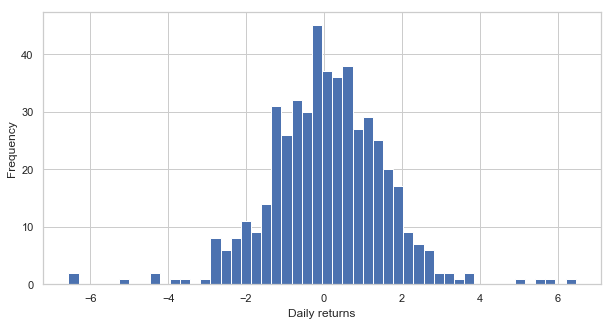

count    490.000000
mean       0.072191
std        1.491135
min       -6.561574
25%       -0.804370
50%        0.056327
75%        1.009923
max        6.463177
Name: Day_Perc_Change, dtype: float64

In [65]:
# Daily returns histogram 

HDFC_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5))   
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()

# satistics
HDFC_df.Day_Perc_Change.describe()

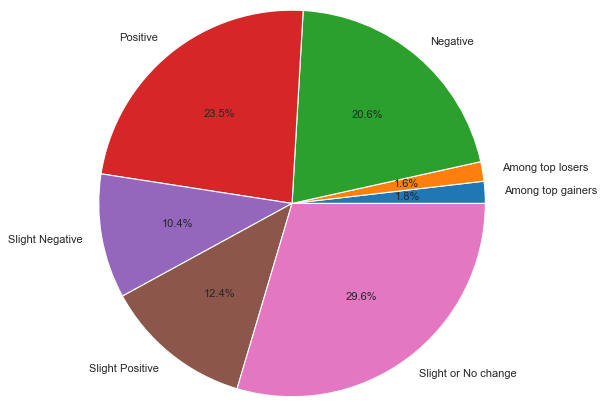

In [26]:
# pie-chart of the trend 

fig = plt.figure(dpi = 80)
HDFC_pie_data = HDFC_df.groupby('Trend')
pie_label = sorted([i for i in HDFC_df.loc[:, 'Trend'].unique()])
plt.pie(HDFC_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)
#plt.label(size=8, weight="bold")
plt.show()

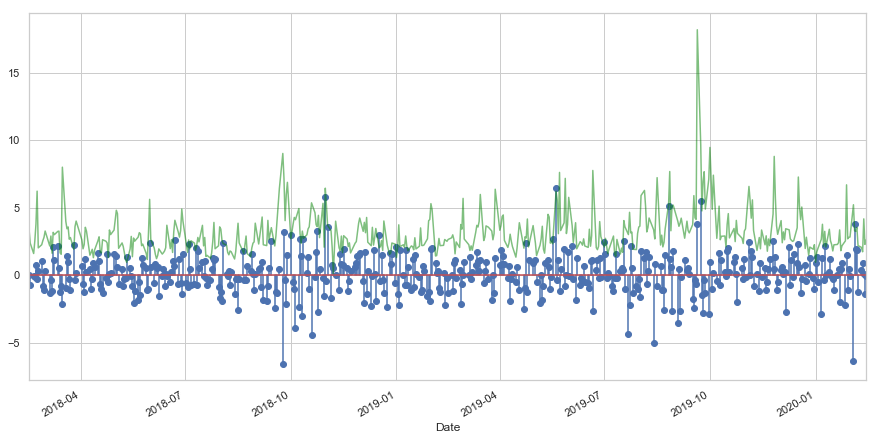

In [67]:
# Superimpose the daily volume plot upon the daily percentage change stem plot

plt.stem(HDFC_df['Date'], HDFC_df['Day_Perc_Change'])
(HDFC_df['Volume']/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)

In [68]:
# import multiple stocks together: HDFC, Jindal Steel, Jubilant Foods, Sun Pharma, TCS along with market index. 

import pandas_datareader.data as web
start = datetime.datetime(2018, 2, 15)
end = datetime.datetime(2020, 2, 14) 
combined_df = web.DataReader(['HDFC.NS', 'JINDALSTEL.NS', 'JUBLFOOD.NS', 
                              'SUNPHARMA.NS', 'TCS.NS', '^NSEI'],
                              'yahoo', start = start, end = end)['Adj Close']
combined_df.head()

Symbols,HDFC.NS,JINDALSTEL.NS,JUBLFOOD.NS,SUNPHARMA.NS,TCS.NS,^NSEI
Date,,,,,,
2018-02-15,1780.624512,265.350006,996.540466,566.225708,1381.652588,10545.500000
2018-02-16,1766.998535,251.500000,966.697205,565.734009,1385.052368,10452.299805
2018-02-19,1765.587524,250.000000,987.599854,552.113159,1380.585327,10378.400391
2018-02-20,1763.348633,252.000000,989.259155,550.244568,1390.577393,10360.400391
2018-02-21,1776.050171,247.300003,985.841492,517.052856,1436.637939,10397.450195


In [4]:
# check for null values 

combined_df.isnull().sum()

Symbols
HDFC.NS          0
JINDALSTEL.NS    0
JUBLFOOD.NS      0
SUNPHARMA.NS     0
TCS.NS           0
^NSEI            1
dtype: int64

In [70]:
# drop null values 

combined_df.dropna(inplace = True, axis = 0)
combined_df.isnull().sum()

Symbols
HDFC.NS          0
JINDALSTEL.NS    0
JUBLFOOD.NS      0
SUNPHARMA.NS     0
TCS.NS           0
^NSEI            0
dtype: int64

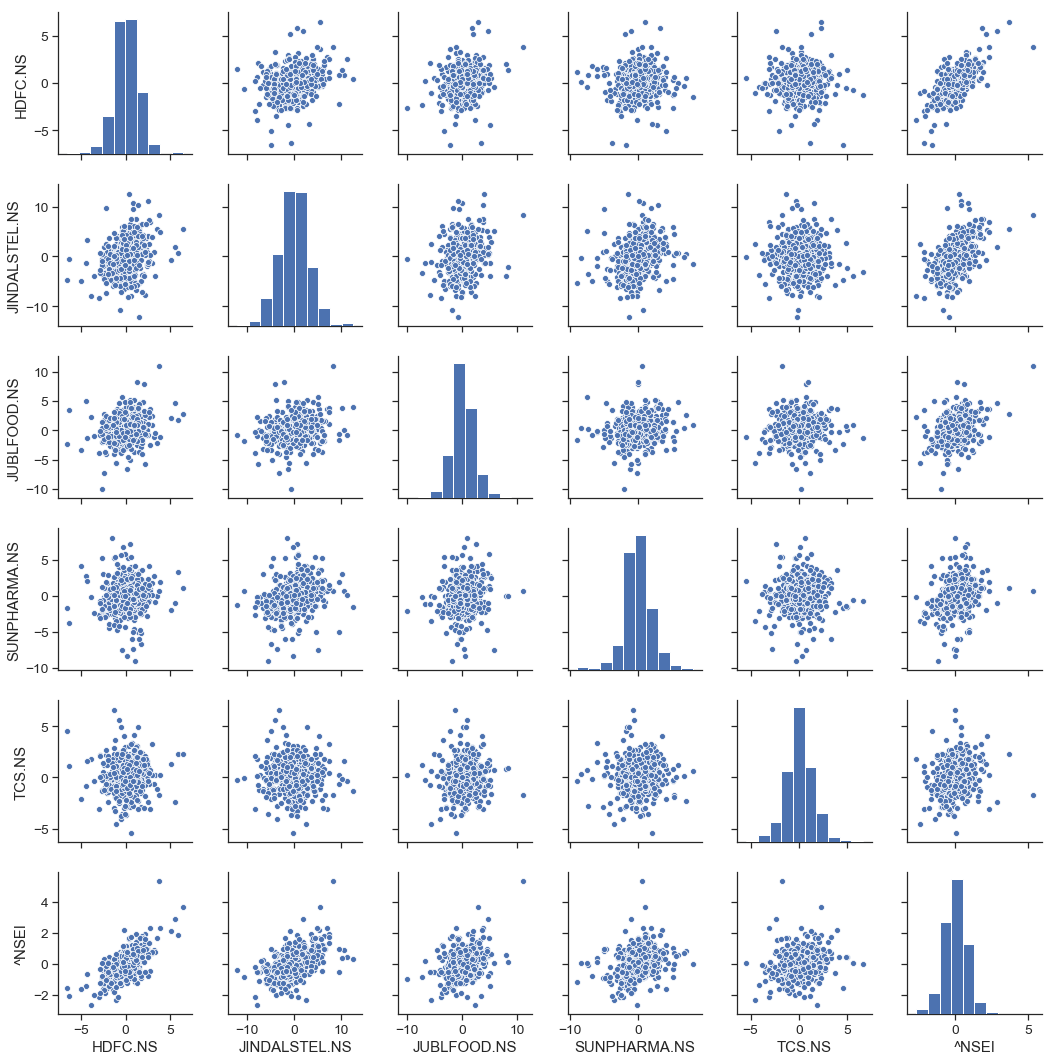

In [71]:
# plot the pair plot of daily percentage of the close price (or daily returns) for all stocks 

pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = 'any', axis = 0)

import seaborn as sns
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(pct_chg_df)

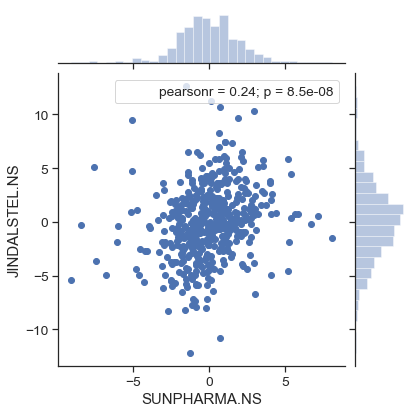

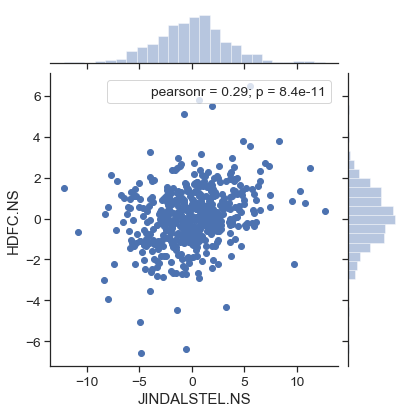

In [72]:
# plot join plots for Sun Pharma v/s Jindal Steel and Jindal Steel v/s HDFC

from scipy.stats import stats

sns.jointplot('SUNPHARMA.NS', 'JINDALSTEL.NS', pct_chg_df, kind = 'scatter').annotate(stats.pearsonr)
sns.jointplot('JINDALSTEL.NS', 'HDFC.NS', pct_chg_df, kind = 'scatter').annotate(stats.pearsonr)
plt.show()

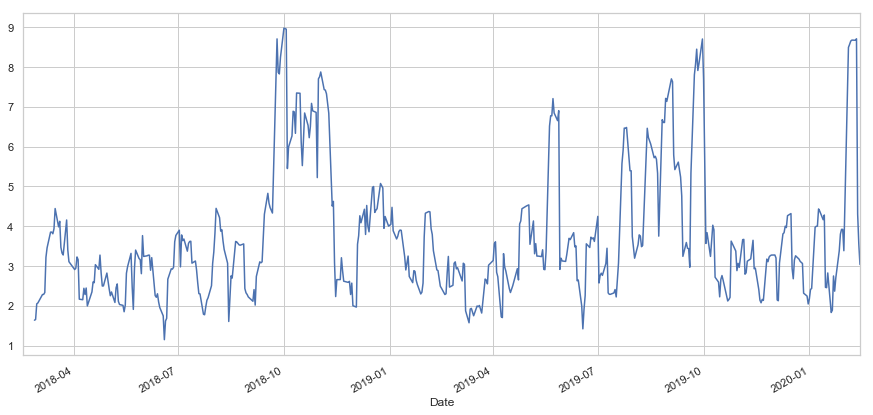

In [73]:
# Determining and plotting volatility(standard deviation) for HDFC stock by taking 7-day rolling window

sns.set(style = 'whitegrid')
HDFC_vol = pct_chg_df['HDFC.NS'].rolling(7).std()*np.sqrt(7)
HDFC_vol.plot(figsize = (15,7))

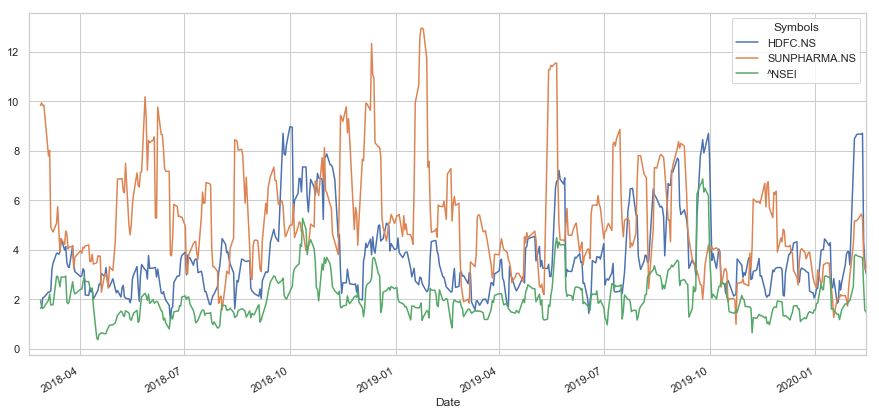

In [43]:
# volatility plot of HDFC, Sun Pharma and Nifty index

volatiliy = pct_chg_df[['HDFC.NS', 'SUNPHARMA.NS', '^NSEI']].rolling(7).std()*np.sqrt(7)
volatiliy.plot(figsize = (15, 7))